# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [26]:
#List for holding lat_lngs and cities
lat_lngs = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

cities = []
countries = []

# Identify nearest city for each lat, lng combination
for lat_lngs in lat_lngs:
    lat, lon = lat_lngs
    name = citipy.nearest_city(lat, lon).city_name
    country_code = citipy.nearest_city(lat, lon).country_code
    cities.append(name)
    countries.append(country_code)
cities_df = pd.DataFrame({"City": cities, "Country": countries})  

# Drop any duplicate values
cities_df = cities_df.drop_duplicates('City')

# Visualize the data frame
cities_df.head()


,City,Country
0,taolanaro,mg
1,severo-kurilsk,ru
2,vaini,to
3,hilo,us
4,olinda,br


In [3]:
#~~~~~~~~~~~~~~~~~~~~~ Creating a dictionary to hold the values

# # Adding additional columns to the exost
# const_cities = {}

# url = "http://api.openweathermap.org/data/2.5/weather?"
# units = "metric"
# query_url = f"{url}appid={api_key}&units={units}&q="

# for city in cities:
#     response = requests.get(query_url + city).json()
#     const_cities[city].city_name = response['name']
#     const_cities[city].city_name = response['name']
#     #const_cities.lat.append(response['coord']['lat'])
    
# print(const_cities) 

In [4]:
# Creating a new DataFrame
cities_df["Date"] = ""
cities_df['Lat'] = ""
cities_df["Lng"] = ""
cities_df["Humidity"] = ""
cities_df["Wind Speed"] = ""
cities_df["Cloudiness"] = ""
cities_df["Max Temp"] = ""

cities_df.head(2)

,City,Country,Date,Lat,Lng,Humidity,Wind Speed,Cloudiness,Max Temp
0,puerto escondido,mx,,,,,,,
1,port moresby,pg,,,,,,,


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
# units = "metric"
# query_url = f"{url}appid={api_key}&units={units}&q="

# cities = ["Paris", "Milan"]
# Start the call counter 
row_count = 1


# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")


for index, row in cities_df.iterrows():
    target_city = row["City"]
    target_url = url + "appid=" + api_key + "&units=IMPERIAL" + "&q=" + target_city.replace(" ","+")
    
#     target_url = "http://api.openweathermap.org/data/2.5/weather?q=%s&units=IMPERIAL&appid=%s" %(row["City"], api_key)
    response = requests.get(target_url).json()
#     print(response)
    print("----------------------")
    print("Now retrieving city #%s: %s" % (row_count + 1, cities_df.loc[index]["City"]))
    print(target_url)

    #print(response)
    try:
        city_df.set_value(index, "Lat", response['coord']['lat'])
        city_df.set_value(index, "Lng", response['coord']['lon'])
        city_df.set_value(index, "Max Temp", response['main']['temp_max'])
        city_df.set_value(index, "Cloudiness", response['clouds']['all'])
        city_df.set_value(index, "Humidity", response['main']['humidity'])
        city_df.set_value(index, "Wind Speed", response['wind']['speed'])
        city_record = response["name"]   
        row_count =+ 1
    except:
         print("City not found. Skipping...")
#         Wait a second in loop to not over exceed rate limit of API
    if row_count % 50 == 0:
        print("**********************")
        print("PAUSE FOR 30 SECONDS")
        print("**********************")
        time.sleep(30)
    
    continue   

Beginning Data Retrieval
-------------------------------
----------------------
Now retrieving city #2: puerto escondido
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=puerto+escondido
City not found. Skipping...
----------------------
Now retrieving city #2: port moresby
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=port+moresby
City not found. Skipping...
----------------------
Now retrieving city #2: albany
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=albany
City not found. Skipping...
----------------------
Now retrieving city #2: rikitea
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=rikitea
City not found. Skipping...
----------------------
Now retrieving city #2: busselton
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204

----------------------
Now retrieving city #2: saint george
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=saint+george
City not found. Skipping...
----------------------
Now retrieving city #2: cabo san lucas
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=cabo+san+lucas
City not found. Skipping...
----------------------
Now retrieving city #2: chokurdakh
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=chokurdakh
City not found. Skipping...
----------------------
Now retrieving city #2: barbar
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=barbar
City not found. Skipping...
----------------------
Now retrieving city #2: gizo
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=gizo
City not found. Skipping...
--------

----------------------
Now retrieving city #2: kapaa
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=kapaa
City not found. Skipping...
----------------------
Now retrieving city #2: taoudenni
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=taoudenni
City not found. Skipping...
----------------------
Now retrieving city #2: nikolskoye
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=nikolskoye
City not found. Skipping...
----------------------
Now retrieving city #2: marquette
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=marquette
City not found. Skipping...
----------------------
Now retrieving city #2: mahibadhoo
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=mahibadhoo
City not found. Skipping...
--------------

----------------------
Now retrieving city #2: vagur
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=vagur
City not found. Skipping...
----------------------
Now retrieving city #2: borzna
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=borzna
City not found. Skipping...
----------------------
Now retrieving city #2: mezen
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=mezen
City not found. Skipping...
----------------------
Now retrieving city #2: hasaki
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=hasaki
City not found. Skipping...
----------------------
Now retrieving city #2: takhatgarh
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=takhatgarh
City not found. Skipping...
----------------------
Now retrievin

----------------------
Now retrieving city #2: satapuala
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=satapuala
City not found. Skipping...
----------------------
Now retrieving city #2: goderich
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=goderich
City not found. Skipping...
----------------------
Now retrieving city #2: attawapiskat
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=attawapiskat
City not found. Skipping...
----------------------
Now retrieving city #2: bonnyville
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=bonnyville
City not found. Skipping...
----------------------
Now retrieving city #2: tasiilaq
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=tasiilaq
City not found. Skipping...
------

----------------------
Now retrieving city #2: valparaiso
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=valparaiso
City not found. Skipping...
----------------------
Now retrieving city #2: belogorsk
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=belogorsk
City not found. Skipping...
----------------------
Now retrieving city #2: isangel
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=isangel
City not found. Skipping...
----------------------
Now retrieving city #2: kutum
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=kutum
City not found. Skipping...
----------------------
Now retrieving city #2: genhe
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=genhe
City not found. Skipping...
----------------------
Now r

----------------------
Now retrieving city #2: trairi
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=trairi
City not found. Skipping...
----------------------
Now retrieving city #2: boras
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=boras
City not found. Skipping...
----------------------
Now retrieving city #2: atuona
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=atuona
City not found. Skipping...
----------------------
Now retrieving city #2: port lincoln
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=port+lincoln
City not found. Skipping...
----------------------
Now retrieving city #2: duz
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=duz
City not found. Skipping...
----------------------
Now retrievin

----------------------
Now retrieving city #2: blackwater
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=blackwater
City not found. Skipping...
----------------------
Now retrieving city #2: inta
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=inta
City not found. Skipping...
----------------------
Now retrieving city #2: evensk
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=evensk
City not found. Skipping...
----------------------
Now retrieving city #2: russell
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=russell
City not found. Skipping...
----------------------
Now retrieving city #2: mongo
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=mongo
City not found. Skipping...
----------------------
Now retrievin

----------------------
Now retrieving city #2: evansville
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=evansville
City not found. Skipping...
----------------------
Now retrieving city #2: kavieng
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=kavieng
City not found. Skipping...
----------------------
Now retrieving city #2: tres arroyos
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=tres+arroyos
City not found. Skipping...
----------------------
Now retrieving city #2: el faiyum
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=el+faiyum
City not found. Skipping...
----------------------
Now retrieving city #2: ahipara
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=ahipara
City not found. Skipping...
----------

----------------------
Now retrieving city #2: teya
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=teya
City not found. Skipping...
----------------------
Now retrieving city #2: samusu
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=samusu
City not found. Skipping...
----------------------
Now retrieving city #2: warqla
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=warqla
City not found. Skipping...
----------------------
Now retrieving city #2: nola
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=nola
City not found. Skipping...
----------------------
Now retrieving city #2: porto novo
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=porto+novo
City not found. Skipping...
----------------------
Now retrieving ci

----------------------
Now retrieving city #2: sorvag
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=sorvag
City not found. Skipping...
----------------------
Now retrieving city #2: flin flon
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=flin+flon
City not found. Skipping...
----------------------
Now retrieving city #2: huari
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=huari
City not found. Skipping...
----------------------
Now retrieving city #2: khonsa
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=khonsa
City not found. Skipping...
----------------------
Now retrieving city #2: boyuibe
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=boyuibe
City not found. Skipping...
----------------------
Now retriev

----------------------
Now retrieving city #2: salalah
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=salalah
City not found. Skipping...
----------------------
Now retrieving city #2: takaka
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=takaka
City not found. Skipping...
----------------------
Now retrieving city #2: polunochnoye
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=polunochnoye
City not found. Skipping...
----------------------
Now retrieving city #2: dianopolis
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=dianopolis
City not found. Skipping...
----------------------
Now retrieving city #2: yumen
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=yumen
City not found. Skipping...
--------------------

----------------------
Now retrieving city #2: belaya gora
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=belaya+gora
City not found. Skipping...
----------------------
Now retrieving city #2: willowmore
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=willowmore
City not found. Skipping...
----------------------
Now retrieving city #2: muroto
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=muroto
City not found. Skipping...
----------------------
Now retrieving city #2: korla
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=korla
City not found. Skipping...
----------------------
Now retrieving city #2: boende
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=boende
City not found. Skipping...
----------------------
N

----------------------
Now retrieving city #2: dunmore town
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=dunmore+town
City not found. Skipping...
----------------------
Now retrieving city #2: cermik
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=cermik
City not found. Skipping...
----------------------
Now retrieving city #2: alofi
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=alofi
City not found. Skipping...
----------------------
Now retrieving city #2: barcarena
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=barcarena
City not found. Skipping...
----------------------
Now retrieving city #2: bandipur
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=bandipur
City not found. Skipping...
--------------------

----------------------
Now retrieving city #2: carballo
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=carballo
City not found. Skipping...
----------------------
Now retrieving city #2: puerto montt
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=puerto+montt
City not found. Skipping...
----------------------
Now retrieving city #2: castilho
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=castilho
City not found. Skipping...
----------------------
Now retrieving city #2: manama
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=manama
City not found. Skipping...
----------------------
Now retrieving city #2: paveh
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=paveh
City not found. Skipping...
----------------------

In [6]:


# Set the initial row count to zero
row_count = 0

print("BEGINNING DATA RETRIEVAL")
print("~~~~~~~~~~~~~~~~~~~~~~~")

# Loop through the cities and perform API Calls
for index, row in cities_df.iterrows():
    target_url = "http://api.openweathermap.org/data/2.5/weather?q=%s&units=IMPERIAL&appid=%s" %(row["City"], api_key)
    response = requests.get(target_url).json()
    print("----------------------")
    print("Now retrieving city #%s: %s" % (row_count + 1, cities_df.loc[index]["City"]))
    print(target_url)
    row_count += 1
    
    try:     
        cities_df.set_value(index, "Lat", response["coord"]["lat"])
        cities_df.set_value(index, "Lng", response["coord"]["lon"])
        cities_df.set_value(index, "Date", response["dt"])
        cities_df.set_value(index, "Humidity", response["main"]["humidity"])
        cities_df.set_value(index, "Max Temp", response["main"]["temp_max"])
        cities_df.set_value(index, "Wind Speed", response["wind"]["speed"])
        cities_df.set_value(index, "Cloudiness", response["clouds"]["all"])
           
    except:
        print("Missing details... skip.")
        
    if row_count % 50 == 0:
        print("~~~~~~~~~~~~~~~~~~~~~~~~")
        print("PAUSE")
        time.sleep(30)
        
print("~~~~~~~~~~~~~~~~~~~~~~~~")
print("DATA RETRIEVAL COMPLETE")


BEGINNING DATA RETRIEVAL
~~~~~~~~~~~~~~~~~~~~~~~
----------------------
Now retrieving city #1: puerto escondido
http://api.openweathermap.org/data/2.5/weather?q=puerto escondido&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e


/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[

----------------------
Now retrieving city #2: port moresby
http://api.openweathermap.org/data/2.5/weather?q=port moresby&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #3: albany
http://api.openweathermap.org/data/2.5/weather?q=albany&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #4: rikitea
http://api.openweathermap.org/data/2.5/weather?q=rikitea&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #5: busselton
http://api.openweathermap.org/data/2.5/weather?q=busselton&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #6: katsuura
http://api.openweathermap.org/data/2.5/weather?q=katsuura&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #7: yunjinghong
http://api.openweathermap.org/data/2.5/weather?q=yunjinghong&units=IMPERIAL&appid=9fab89d1775a585

----------------------
Now retrieving city #50: port alfred
http://api.openweathermap.org/data/2.5/weather?q=port alfred&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
~~~~~~~~~~~~~~~~~~~~~~~~
PAUSE
----------------------
Now retrieving city #51: verkh-usugli
http://api.openweathermap.org/data/2.5/weather?q=verkh-usugli&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #52: cape town
http://api.openweathermap.org/data/2.5/weather?q=cape town&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #53: skjervoy
http://api.openweathermap.org/data/2.5/weather?q=skjervoy&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #54: saint-pierre
http://api.openweathermap.org/data/2.5/weather?q=saint-pierre&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #55: east london
http://api.openweathermap.org/data/2.5/w

----------------------
Now retrieving city #101: bargal
http://api.openweathermap.org/data/2.5/weather?q=bargal&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
Missing details... skip.
----------------------
Now retrieving city #102: eureka
http://api.openweathermap.org/data/2.5/weather?q=eureka&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #103: samarai
http://api.openweathermap.org/data/2.5/weather?q=samarai&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #104: warrnambool
http://api.openweathermap.org/data/2.5/weather?q=warrnambool&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #105: coquimbo
http://api.openweathermap.org/data/2.5/weather?q=coquimbo&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #106: poltar
http://api.openweathermap.org/data/2.5/weather?q=poltar&units=IMPERIAL&ap

----------------------
Now retrieving city #151: dongsheng
http://api.openweathermap.org/data/2.5/weather?q=dongsheng&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #152: tiksi
http://api.openweathermap.org/data/2.5/weather?q=tiksi&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #153: khatanga
http://api.openweathermap.org/data/2.5/weather?q=khatanga&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #154: vila velha
http://api.openweathermap.org/data/2.5/weather?q=vila velha&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #155: dharchula
http://api.openweathermap.org/data/2.5/weather?q=dharchula&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #156: avdiyivka
http://api.openweathermap.org/data/2.5/weather?q=avdiyivka&units=IMPERIAL&appid=9fab89d17

----------------------
Now retrieving city #201: torbay
http://api.openweathermap.org/data/2.5/weather?q=torbay&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #202: bambous virieux
http://api.openweathermap.org/data/2.5/weather?q=bambous virieux&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #203: byron bay
http://api.openweathermap.org/data/2.5/weather?q=byron bay&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #204: jutai
http://api.openweathermap.org/data/2.5/weather?q=jutai&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #205: provideniya
http://api.openweathermap.org/data/2.5/weather?q=provideniya&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #206: sitka
http://api.openweathermap.org/data/2.5/weather?q=sitka&units=IMPERIAL&appid=9fab89d

----------------------
Now retrieving city #251: troitsko-pechorsk
http://api.openweathermap.org/data/2.5/weather?q=troitsko-pechorsk&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #252: badarpur
http://api.openweathermap.org/data/2.5/weather?q=badarpur&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #253: joao pinheiro
http://api.openweathermap.org/data/2.5/weather?q=joao pinheiro&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #254: gwadar
http://api.openweathermap.org/data/2.5/weather?q=gwadar&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #255: illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?q=illoqqortoormiut&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
Missing details... skip.
----------------------
Now retrieving city #256: aklavik
http://api.openweathermap.or

----------------------
Now retrieving city #298: ancud
http://api.openweathermap.org/data/2.5/weather?q=ancud&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #299: obeliai
http://api.openweathermap.org/data/2.5/weather?q=obeliai&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #300: maniitsoq
http://api.openweathermap.org/data/2.5/weather?q=maniitsoq&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
~~~~~~~~~~~~~~~~~~~~~~~~
PAUSE
----------------------
Now retrieving city #301: blackwater
http://api.openweathermap.org/data/2.5/weather?q=blackwater&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #302: inta
http://api.openweathermap.org/data/2.5/weather?q=inta&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #303: evensk
http://api.openweathermap.org/data/2.5/weather?q=evensk&units=IMPERIAL&ap

----------------------
Now retrieving city #346: tres arroyos
http://api.openweathermap.org/data/2.5/weather?q=tres arroyos&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #347: el faiyum
http://api.openweathermap.org/data/2.5/weather?q=el faiyum&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
Missing details... skip.
----------------------
Now retrieving city #348: ahipara
http://api.openweathermap.org/data/2.5/weather?q=ahipara&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #349: svetlogorsk
http://api.openweathermap.org/data/2.5/weather?q=svetlogorsk&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #350: hirado
http://api.openweathermap.org/data/2.5/weather?q=hirado&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
~~~~~~~~~~~~~~~~~~~~~~~~
PAUSE
----------------------
Now retrieving city #351: gulaothi
http://api.openweathermap.

----------------------
Now retrieving city #393: ballina
http://api.openweathermap.org/data/2.5/weather?q=ballina&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #394: acarau
http://api.openweathermap.org/data/2.5/weather?q=acarau&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
Missing details... skip.
----------------------
Now retrieving city #395: zeya
http://api.openweathermap.org/data/2.5/weather?q=zeya&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #396: manggar
http://api.openweathermap.org/data/2.5/weather?q=manggar&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #397: port hardy
http://api.openweathermap.org/data/2.5/weather?q=port hardy&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #398: saltpond
http://api.openweathermap.org/data/2.5/weather?q=saltpond&units=IMPERIAL&appid=

----------------------
Now retrieving city #441: praia da vitoria
http://api.openweathermap.org/data/2.5/weather?q=praia da vitoria&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #442: aksu
http://api.openweathermap.org/data/2.5/weather?q=aksu&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #443: deputatskiy
http://api.openweathermap.org/data/2.5/weather?q=deputatskiy&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #444: bianzhuang
http://api.openweathermap.org/data/2.5/weather?q=bianzhuang&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #445: lai
http://api.openweathermap.org/data/2.5/weather?q=lai&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #446: sangar
http://api.openweathermap.org/data/2.5/weather?q=sangar&units=IMPERIAL&appid=9fab89d17

----------------------
Now retrieving city #489: zaysan
http://api.openweathermap.org/data/2.5/weather?q=zaysan&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #490: mitsamiouli
http://api.openweathermap.org/data/2.5/weather?q=mitsamiouli&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #491: quatre cocos
http://api.openweathermap.org/data/2.5/weather?q=quatre cocos&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #492: ponta do sol
http://api.openweathermap.org/data/2.5/weather?q=ponta do sol&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #493: talnakh
http://api.openweathermap.org/data/2.5/weather?q=talnakh&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #494: lavrentiya
http://api.openweathermap.org/data/2.5/weather?q=lavrentiya&units=IMPERIAL

----------------------
Now retrieving city #537: gashua
http://api.openweathermap.org/data/2.5/weather?q=gashua&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #538: hamilton
http://api.openweathermap.org/data/2.5/weather?q=hamilton&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #539: arman
http://api.openweathermap.org/data/2.5/weather?q=arman&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #540: meiganga
http://api.openweathermap.org/data/2.5/weather?q=meiganga&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #541: oranjemund
http://api.openweathermap.org/data/2.5/weather?q=oranjemund&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #542: abu samrah
http://api.openweathermap.org/data/2.5/weather?q=abu samrah&units=IMPERIAL&appid=9fab89d1775a585

----------------------
Now retrieving city #586: egvekinot
http://api.openweathermap.org/data/2.5/weather?q=egvekinot&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #587: lasa
http://api.openweathermap.org/data/2.5/weather?q=lasa&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #588: tapaua
http://api.openweathermap.org/data/2.5/weather?q=tapaua&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
Missing details... skip.
----------------------
Now retrieving city #589: khipro
http://api.openweathermap.org/data/2.5/weather?q=khipro&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #590: sorong
http://api.openweathermap.org/data/2.5/weather?q=sorong&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #591: flinders
http://api.openweathermap.org/data/2.5/weather?q=flinders&units=IMPERIAL&appid=9fab89

----------------------
Now retrieving city #638: hervey bay
http://api.openweathermap.org/data/2.5/weather?q=hervey bay&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #639: sao joao da barra
http://api.openweathermap.org/data/2.5/weather?q=sao joao da barra&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #640: priargunsk
http://api.openweathermap.org/data/2.5/weather?q=priargunsk&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
----------------------
Now retrieving city #641: dotnuva
http://api.openweathermap.org/data/2.5/weather?q=dotnuva&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
~~~~~~~~~~~~~~~~~~~~~~~~
DATA RETRIEVAL COMPLETE


In [7]:
cities_df.head(2)

,City,Country,Date,Lat,Lng,Humidity,Wind Speed,Cloudiness,Max Temp
0,puerto escondido,mx,1556307900,15.86,-97.07,62,9.17,40,86
1,port moresby,pg,1556308800,-9.47,147.16,100,3.36,40,77


In [8]:
# Replace empty rows with NuN
cities_df['Date'].replace('', np.nan, inplace=True)
cities_df['Lat'].replace('', np.nan, inplace=True)
cities_df['Lng'].replace('', np.nan, inplace=True)
cities_df['Humidity'].replace('', np.nan, inplace=True)
cities_df['Wind Speed'].replace('', np.nan, inplace=True)
cities_df['Cloudiness'].replace('', np.nan, inplace=True)
cities_df['Max Temp'].replace('', np.nan, inplace=True)

cities_df

,City,Country,Date,Lat,Lng,Humidity,Wind Speed,Cloudiness,Max Temp
0,puerto escondido,mx,1.556308e+09,15.86,-97.07,62.0,9.17,40.0,86.00
1,port moresby,pg,1.556309e+09,-9.47,147.16,100.0,3.36,40.0,77.00
2,albany,au,1.556313e+09,42.65,-73.75,76.0,8.05,75.0,60.01
3,rikitea,pf,1.556313e+09,-23.12,-134.97,86.0,18.99,100.0,76.19
4,busselton,au,1.556312e+09,-33.64,115.35,85.0,16.67,0.0,48.00
5,katsuura,jp,1.556312e+09,33.93,134.50,71.0,25.28,40.0,54.00
6,yunjinghong,cn,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,bonavista,ca,1.556312e+09,48.65,-53.11,87.0,8.01,99.0,32.00
8,bredasdorp,za,1.556312e+09,-34.53,20.04,93.0,2.24,1.0,61.00
9,punta arenas,cl,1.556313e+09,-53.16,-70.91,37.0,21.92,0.0,53.60


In [9]:
# Dropn NaN Rows
clean_cities_df = cities_df.dropna()
clean_cities_df

,City,Country,Date,Lat,Lng,Humidity,Wind Speed,Cloudiness,Max Temp
0,puerto escondido,mx,1.556308e+09,15.86,-97.07,62.0,9.17,40.0,86.00
1,port moresby,pg,1.556309e+09,-9.47,147.16,100.0,3.36,40.0,77.00
2,albany,au,1.556313e+09,42.65,-73.75,76.0,8.05,75.0,60.01
3,rikitea,pf,1.556313e+09,-23.12,-134.97,86.0,18.99,100.0,76.19
4,busselton,au,1.556312e+09,-33.64,115.35,85.0,16.67,0.0,48.00
5,katsuura,jp,1.556312e+09,33.93,134.50,71.0,25.28,40.0,54.00
7,bonavista,ca,1.556312e+09,48.65,-53.11,87.0,8.01,99.0,32.00
8,bredasdorp,za,1.556312e+09,-34.53,20.04,93.0,2.24,1.0,61.00
9,punta arenas,cl,1.556313e+09,-53.16,-70.91,37.0,21.92,0.0,53.60
10,dovolnoye,ru,1.556313e+09,54.50,79.67,53.0,4.52,100.0,30.11


In [10]:
# Is 1970-01-01 the right date?
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# clean_cities_df['Date'] = clean_cities_df['Date'].astype('datetime64[ns]')
# clean_cities_df
clean_cities_df['Date'] = pd.to_datetime(clean_cities_df['Date'], unit='s')
clean_cities_df

/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,City,Country,Date,Lat,Lng,Humidity,Wind Speed,Cloudiness,Max Temp
0,puerto escondido,mx,2019-04-26 19:45:00,15.86,-97.07,62.0,9.17,40.0,86.00
1,port moresby,pg,2019-04-26 20:00:00,-9.47,147.16,100.0,3.36,40.0,77.00
2,albany,au,2019-04-26 21:08:42,42.65,-73.75,76.0,8.05,75.0,60.01
3,rikitea,pf,2019-04-26 21:12:12,-23.12,-134.97,86.0,18.99,100.0,76.19
4,busselton,au,2019-04-26 21:00:04,-33.64,115.35,85.0,16.67,0.0,48.00
5,katsuura,jp,2019-04-26 20:54:43,33.93,134.50,71.0,25.28,40.0,54.00
7,bonavista,ca,2019-04-26 21:01:22,48.65,-53.11,87.0,8.01,99.0,32.00
8,bredasdorp,za,2019-04-26 21:00:57,-34.53,20.04,93.0,2.24,1.0,61.00
9,punta arenas,cl,2019-04-26 21:13:07,-53.16,-70.91,37.0,21.92,0.0,53.60
10,dovolnoye,ru,2019-04-26 21:12:13,54.50,79.67,53.0,4.52,100.0,30.11


In [24]:
clean_cities_df.to_html('cities.html')


In [11]:
# Have to save the final file 
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# converting DataFrame to csv
clean_cities_df.to_csv("clean_cities.csv", index=False, header=True)

#### Latitude vs. Temperature Plot

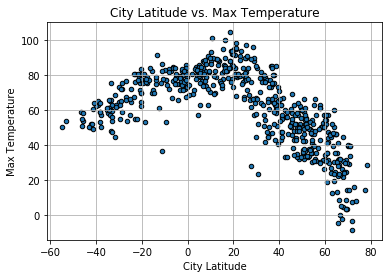

In [23]:
ax1 = cities_df.plot.scatter(x='Lat',
                       y='Max Temp',
                       facecolors="blue", marker="o", edgecolors="black", alpha=1)
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("City Latitude")
plt.ylabel("Max Temperature")
plt.grid()
plt.savefig("lat_vs_max_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

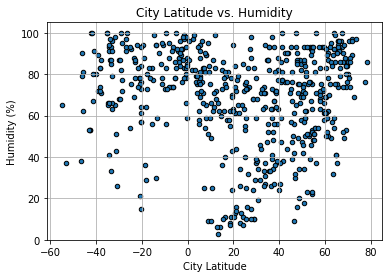

In [22]:
ax2 = clean_cities_df.plot.scatter(x='Lat',
                       y='Humidity',
                       facecolors="blue", marker="o", edgecolors="black", alpha=1)
plt.title("City Latitude vs. Humidity")
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0, 105)
plt.grid()
plt.savefig("lat_vs_humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

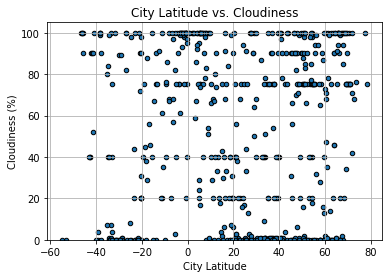

In [21]:
ax3 = clean_cities_df.plot.scatter(x='Lat',
                       y='Cloudiness',
                       facecolors="blue", marker="o", edgecolors="black", alpha=1)
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(0, 105)
plt.grid()
plt.savefig("lat_vs_cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

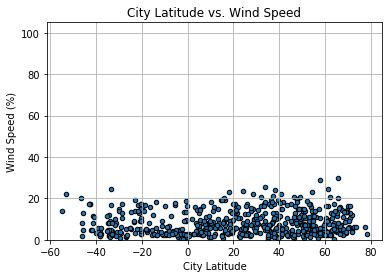

In [20]:
ax4 = clean_cities_df.plot.scatter(x='Lat',
                       y='Wind Speed',
                       facecolors="blue", marker="o", edgecolors="black", alpha=1)
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (%)")
plt.ylim(0, 105)
plt.grid()
plt.savefig("lat_vs_wind_speed.png")
plt.show()